In [1]:
import os
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import shutil
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import numpy as np
import glob
from tqdm import tqdm
from pathlib import Path
import json
import random


In [2]:
dataset_path = '/datasets/ricordi'

In [3]:
def data_json(dataset_path):
    dataset = []
    # iterate through all folders in the directory
    for folder in glob.glob(dataset_path + '/*'):
        for files in glob.glob(folder + '/*'):
            # check if the file is either a folder or a json file
            if os.path.isdir(files):
                for data_path in glob.glob(files + '/*'):
                    dataset.append(glob.glob(data_path + '/*.json'))
            elif files.endswith('.json'):
                dataset.append(files)
    dataset = list(flatten(dataset))
    print("Total json files:", len(dataset))
    return dataset

In [4]:
def sort_by_key(data,key):
    dataset = []
    for i in data:
        f = open(i)
        json_data = json.load(f)
        if key in json_data:
            dataset.append(i)
        else:
            continue
    print("Json with annotazione1 present:",len(dataset))
    return dataset

In [5]:
dmerge_classes = [[2, 15], [7, 9]]
classes_relevant = [5,6,7,8,9,10,11,12,14,16]
classes_irrelevant = [0,1,2,3,4,15,17]
classes = classes_relevant + classes_irrelevant

# Define the class names in the same order as the classes list
class_names_relevant = [
    "Pause (full or almost)",
    "Single note (with at least the head)",
    "Multiple Notes (with at least the head)",
    "Single chord (with at least heads)",
    "Multiple chords (with at least heads)",
    "Accidental(s) (whole or nearly so)",
    "Key(s) (whole(s) or nearly)",
    "Embellishment(s) (whole(s) or nearly)",
    "More categories (with at least one musical score)",
    "Other (with at least one musical score)"
]

class_names_irrelevant = [
    "Page border",
    "Erasure",
    "Blurr",
    "Printed Text",
    "Manuscript Text",
    "More categories (no musical scores)",
    "Other (without musical markings)"
]

# Combine the relevant and irrelevant class names
class_names = class_names_relevant + class_names_irrelevant

In [6]:
json_list = data_json(dataset_path)
sorted_list_by_key = sort_by_key(json_list, "annotazione1")

Total json files: 469590


Json with annotazione1 present: 196639


In [7]:
def plot_distribution_by_class(sorted_list_by_key, classes, key):
    count = {i: 0 for i in classes}
    
    for i in sorted_list_by_key:
        with open(i) as f:
            json_data = json.load(f)
            class_index = json_data[key]
            count[class_index] += 1
    
    print(count)

    # reorder classes, relevant first
    count = [count[i] for i in classes_relevant] + [count[i] for i in classes_irrelevant]
    labels = ["Relevant"] + [None] * (len(classes_relevant) - 1) + ["Irrelevant"] + [None] * (len(classes_irrelevant) - 1)
    colors = ["tab:red" for _ in classes_relevant] + ["tab:blue" for _ in classes_irrelevant]
    
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    
    x = np.arange(len(classes))  # Generate an array of class indices
    plt.rcParams.update({'font.size': 8})
    plt.bar(x, count, label=labels, color=colors)
    plt.xticks(x, class_names, rotation=45, ha='right')  # Set custom x-axis tick positions and labels
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.title("Class Count")
    plt.legend()
    plt.show()


{5: 316, 6: 2998, 7: 5621, 8: 975, 9: 818, 10: 2206, 11: 3370, 12: 779, 14: 9039, 16: 1173, 0: 118966, 1: 10370, 2: 13052, 3: 4246, 4: 12501, 15: 1443, 17: 8766}


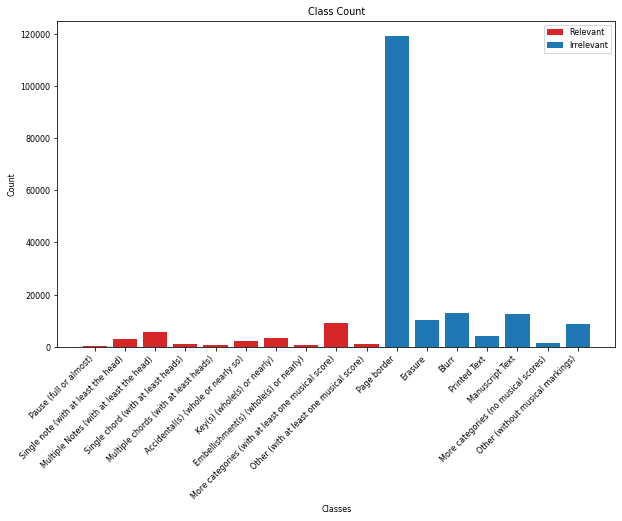

In [8]:
plot_distribution_by_class(sorted_list_by_key,classes, "annotazione1")

In [9]:
from pathlib import Path

binary_dataset_path = Path('binary_dataset')
relevant_path = binary_dataset_path / 'data' / 'relevant'
irrelevant_path = binary_dataset_path / 'data' / 'irrelevant'
relevant_path.mkdir(exist_ok=True, parents=True)
irrelevant_path.mkdir(exist_ok=True, parents=True)

multiclass_dataset_path = Path('multiclass_dataset') / 'data'
for cl in class_names:
    (multiclass_dataset_path / cl).mkdir(exist_ok=True, parents=True)

In [10]:
from shutil import copyfile

# copy all relevant images to both datasets
for json_file in tqdm(Path(dataset_path).glob("**/*.json")):
    with open(json_file, 'r') as f:
        data = json.load(f)
        if "annotazione1" in data:
            label = int(data["annotazione1"])
            class_path = multiclass_dataset_path / class_names[classes.index(label)]
            png_path = Path(data["path"][18:])
            copyfile(dataset_path / png_path, class_path / png_path.name)
            if label in classes_irrelevant:
                copyfile(dataset_path / png_path, irrelevant_path / png_path.name)
            elif label in classes_relevant:
                copyfile(dataset_path / png_path, relevant_path / png_path.name)
            else:
                print("Unknown label!")

0it [00:00, ?it/s]

850it [00:00, 8472.82it/s]

1698it [00:00, 8339.88it/s]

2533it [00:00, 6295.15it/s]

3426it [00:00, 7155.84it/s]

4589it [00:00, 8580.53it/s]

5511it [00:00, 8778.13it/s]

6422it [00:00, 7994.37it/s]

7335it [00:00, 8313.47it/s]

8237it [00:01, 8513.68it/s]

9108it [00:01, 7953.07it/s]

9934it [00:01, 8038.07it/s]

10860it [00:01, 8384.69it/s]

11785it [00:01, 8633.62it/s]

12762it [00:01, 8961.60it/s]

13726it [00:01, 9159.46it/s]

14703it [00:01, 9339.45it/s]

15642it [00:01, 9199.14it/s]

16673it [00:01, 9526.05it/s]

17629it [00:02, 9279.34it/s]

18561it [00:02, 8622.39it/s]

19683it [00:02, 9342.32it/s]

20630it [00:02, 8544.47it/s]

21525it [00:02, 8653.23it/s]

22406it [00:02, 7983.13it/s]

23232it [00:02, 8057.01it/s]

24128it [00:02, 8305.16it/s]

25008it [00:02, 8442.42it/s]

25862it [00:03, 8207.32it/s]

26690it [00:03, 8031.70it/s]

27566it [00:03, 8237.36it/s]

28436it [00:03, 8370.05it/s]

29401it [00:03, 8743.23it/s]

30438it [00:03, 9220.78it/s]

31382it [00:03, 9280.87it/s]

32313it [00:03, 9127.45it/s]

33232it [00:03, 9141.94it/s]

34203it [00:03, 9309.50it/s]

35203it [00:04, 9514.14it/s]

36156it [00:04, 9206.81it/s]

37086it [00:04, 9230.52it/s]

38012it [00:04, 8514.31it/s]

38906it [00:04, 8629.19it/s]

39778it [00:04, 7952.68it/s]

40715it [00:04, 8337.72it/s]

41636it [00:04, 8580.49it/s]

42556it [00:04, 8754.53it/s]

43441it [00:05, 8733.78it/s]

44321it [00:05, 8287.63it/s]

45355it [00:05, 8865.77it/s]

46251it [00:05, 8875.48it/s]

47146it [00:05, 8851.49it/s]

48036it [00:05, 8818.51it/s]

48921it [00:05, 6435.45it/s]

49658it [00:05, 6597.15it/s]

50387it [00:06, 6766.71it/s]

51253it [00:06, 7261.37it/s]

52023it [00:06, 7124.84it/s]

52899it [00:06, 7571.39it/s]

53908it [00:06, 8277.38it/s]

54759it [00:06, 7687.40it/s]

55806it [00:06, 8445.54it/s]

56705it [00:06, 8597.87it/s]

57583it [00:06, 8581.52it/s]

58454it [00:06, 7992.97it/s]

59363it [00:07, 8296.36it/s]

60463it [00:07, 9058.69it/s]

61383it [00:07, 8443.81it/s]

62293it [00:07, 8622.25it/s]

63172it [00:07, 8667.48it/s]

64049it [00:07, 8609.16it/s]

64917it [00:07, 8541.13it/s]

65892it [00:07, 8888.17it/s]

66786it [00:07, 8865.03it/s]

67676it [00:08, 8869.86it/s]

68764it [00:08, 9463.16it/s]

69713it [00:08, 9284.19it/s]

70644it [00:08, 9118.06it/s]

71558it [00:08, 8566.99it/s]

72563it [00:08, 8983.82it/s]

73485it [00:08, 9049.95it/s]

74396it [00:08, 9059.56it/s]

75307it [00:08, 8561.49it/s]

76171it [00:08, 8102.93it/s]

77015it [00:09, 8194.48it/s]

77842it [00:09, 7508.13it/s]

78740it [00:09, 7905.07it/s]

79713it [00:09, 8404.34it/s]

80627it [00:09, 8612.35it/s]

81508it [00:09, 8667.46it/s]

82383it [00:09, 7841.92it/s]

83418it [00:09, 8526.74it/s]

84291it [00:09, 8583.37it/s]

85262it [00:10, 8905.12it/s]

86165it [00:10, 8588.86it/s]

87145it [00:10, 8932.17it/s]

88048it [00:10, 8742.37it/s]

88971it [00:10, 8881.38it/s]

89865it [00:10, 8405.71it/s]

90898it [00:10, 8943.16it/s]

91802it [00:10, 8952.47it/s]

92708it [00:10, 8976.77it/s]

93671it [00:11, 9167.59it/s]

94592it [00:11, 8993.90it/s]

95495it [00:11, 6609.72it/s]

96369it [00:11, 7106.96it/s]

97158it [00:11, 7204.98it/s]

97935it [00:11, 7261.39it/s]

98705it [00:11, 7378.30it/s]

99630it [00:11, 7898.04it/s]

100533it [00:11, 8212.99it/s]

101374it [00:12, 8072.71it/s]

102287it [00:12, 8375.64it/s]

103173it [00:12, 8514.51it/s]

104033it [00:12, 8446.87it/s]

104884it [00:12, 7792.41it/s]

105943it [00:12, 8569.41it/s]

106816it [00:12, 8539.57it/s]

107700it [00:12, 8625.26it/s]

108571it [00:12, 8545.26it/s]

109431it [00:13, 7948.42it/s]

110309it [00:13, 8179.69it/s]

111203it [00:13, 8394.95it/s]

112051it [00:13, 7780.94it/s]

113027it [00:13, 8323.26it/s]

113889it [00:13, 8404.91it/s]

114771it [00:13, 8521.21it/s]

115776it [00:13, 8966.08it/s]

116680it [00:13, 8857.82it/s]

117571it [00:13, 8314.38it/s]

118421it [00:14, 8364.88it/s]

119265it [00:14, 8053.10it/s]

120260it [00:14, 8582.79it/s]

121143it [00:14, 8650.10it/s]

122098it [00:14, 8907.69it/s]

122994it [00:14, 8846.47it/s]

123882it [00:14, 8792.58it/s]

124794it [00:14, 8885.49it/s]

125821it [00:14, 9293.46it/s]

126753it [00:15, 8427.77it/s]

127613it [00:15, 8407.38it/s]

128466it [00:15, 8168.82it/s]

129365it [00:15, 8396.28it/s]

130213it [00:15, 8332.71it/s]

131052it [00:15, 7950.64it/s]

131898it [00:15, 8093.95it/s]

132876it [00:15, 8575.14it/s]

133808it [00:15, 8791.51it/s]

134692it [00:15, 8753.31it/s]

135673it [00:16, 9062.04it/s]

136583it [00:16, 8085.80it/s]

137451it [00:16, 8246.35it/s]

138405it [00:16, 8606.13it/s]

139469it [00:16, 9187.75it/s]

140401it [00:16, 8869.56it/s]

141299it [00:16, 6023.84it/s]

142028it [00:17, 6206.53it/s]

142766it [00:17, 6478.75it/s]

143622it [00:17, 6998.47it/s]

144543it [00:17, 7576.67it/s]

145538it [00:17, 8224.08it/s]

146444it [00:17, 8454.98it/s]

147350it [00:17, 8626.22it/s]

148464it [00:17, 9345.19it/s]

149417it [00:17, 9075.71it/s]

150339it [00:17, 9025.68it/s]

151252it [00:18, 8874.95it/s]

152147it [00:18, 8883.28it/s]

153041it [00:18, 8358.78it/s]

153886it [00:18, 8020.15it/s]

154696it [00:18, 7946.57it/s]

155582it [00:18, 8194.75it/s]

156407it [00:18, 7925.35it/s]

157205it [00:18, 7820.87it/s]

158138it [00:18, 8247.67it/s]

158968it [00:18, 8247.76it/s]

159882it [00:19, 8507.95it/s]

160736it [00:19, 8127.41it/s]

161662it [00:19, 8450.00it/s]

162583it [00:19, 8669.10it/s]

163455it [00:19, 8621.11it/s]

164321it [00:19, 8621.93it/s]

165230it [00:19, 8759.33it/s]

166339it [00:19, 9438.88it/s]

167285it [00:19, 9006.37it/s]

168191it [00:20, 8845.02it/s]

169080it [00:20, 8792.34it/s]

169962it [00:20, 8555.46it/s]

170821it [00:20, 8433.59it/s]

171666it [00:20, 8272.00it/s]

172643it [00:20, 8697.09it/s]

173538it [00:20, 8770.12it/s]

174450it [00:20, 8869.18it/s]

175339it [00:20, 8321.33it/s]

176221it [00:20, 8459.55it/s]

177237it [00:21, 8949.29it/s]

178139it [00:21, 8930.98it/s]

179037it [00:21, 8925.51it/s]

179933it [00:21, 8354.30it/s]

180778it [00:21, 8246.83it/s]

181698it [00:21, 8513.85it/s]

182710it [00:21, 8976.64it/s]

183614it [00:21, 8872.38it/s]

184542it [00:21, 8990.68it/s]

185445it [00:22, 8251.74it/s]

186456it [00:22, 8765.34it/s]

187346it [00:22, 8797.66it/s]

188236it [00:22, 8784.75it/s]

189135it [00:22, 8841.75it/s]

190024it [00:22, 8794.95it/s]

190907it [00:22, 8791.89it/s]

191789it [00:22, 7629.01it/s]

192581it [00:22, 7192.39it/s]

193488it [00:23, 7683.79it/s]

194590it [00:23, 8593.53it/s]

195504it [00:23, 8743.81it/s]

196397it [00:23, 5588.21it/s]

197126it [00:23, 5936.66it/s]

197948it [00:23, 6452.34it/s]

198755it [00:23, 6848.41it/s]

199522it [00:23, 6937.55it/s]

200394it [00:24, 7410.08it/s]

201437it [00:24, 8243.18it/s]

202301it [00:24, 7976.89it/s]

203134it [00:24, 8074.38it/s]

203963it [00:24, 7849.98it/s]

204764it [00:24, 7688.67it/s]

205611it [00:24, 7907.71it/s]

206411it [00:24, 7696.28it/s]

207191it [00:24, 7721.46it/s]

207969it [00:25, 7319.32it/s]

208856it [00:25, 7753.89it/s]

209640it [00:25, 7523.46it/s]

210519it [00:25, 7878.72it/s]

211490it [00:25, 8405.88it/s]

212359it [00:25, 8484.48it/s]

213250it [00:25, 8605.38it/s]

214116it [00:25, 8617.66it/s]

214999it [00:25, 8680.62it/s]

215869it [00:25, 8249.48it/s]

216704it [00:26, 8277.91it/s]

217554it [00:26, 8341.65it/s]

218438it [00:26, 8484.04it/s]

219289it [00:26, 8054.03it/s]

220148it [00:26, 8205.83it/s]

221174it [00:26, 8799.57it/s]

222060it [00:26, 8273.92it/s]

222922it [00:26, 8367.81it/s]

223888it [00:26, 8738.23it/s]

224804it [00:26, 8858.30it/s]

225695it [00:27, 8750.69it/s]

226615it [00:27, 8881.53it/s]

227507it [00:27, 8500.18it/s]

228363it [00:27, 8311.85it/s]

229282it [00:27, 8562.57it/s]

230143it [00:27, 8069.88it/s]

231040it [00:27, 8321.28it/s]

232006it [00:27, 8703.02it/s]

232884it [00:27, 8692.32it/s]

233783it [00:28, 8777.59it/s]

234670it [00:28, 8803.55it/s]

235636it [00:28, 9056.22it/s]

236544it [00:28, 8954.72it/s]

237442it [00:28, 8919.20it/s]

238336it [00:28, 8569.20it/s]

239218it [00:28, 8639.35it/s]

240115it [00:28, 8735.32it/s]

241067it [00:28, 8965.08it/s]

241966it [00:28, 8845.33it/s]

242855it [00:29, 8854.20it/s]

243787it [00:29, 8991.18it/s]

244688it [00:29, 8560.61it/s]

245848it [00:29, 9432.90it/s]

246799it [00:29, 8553.17it/s]

247674it [00:29, 8561.59it/s]

248544it [00:29, 8568.65it/s]

249411it [00:29, 7941.69it/s]

250248it [00:29, 8057.96it/s]

251065it [00:30, 7924.88it/s]

251917it [00:30, 8082.19it/s]

252732it [00:30, 8040.13it/s]

253550it [00:30, 8080.23it/s]

254385it [00:30, 8158.07it/s]

255362it [00:30, 8632.71it/s]

256228it [00:30, 8159.90it/s]

257107it [00:30, 8336.49it/s]

257994it [00:30, 8489.91it/s]

258949it [00:30, 8794.41it/s]

259833it [00:31, 8234.75it/s]

260742it [00:31, 8476.06it/s]

261605it [00:31, 8518.43it/s]

262463it [00:31, 7760.52it/s]

263346it [00:31, 8051.64it/s]

264314it [00:31, 8505.13it/s]

265184it [00:31, 8557.24it/s]

266055it [00:31, 8601.35it/s]

266922it [00:31, 8230.47it/s]

267753it [00:32, 4976.94it/s]

268646it [00:32, 5755.51it/s]

269374it [00:32, 6004.40it/s]

270214it [00:32, 6570.58it/s]

270966it [00:32, 6705.44it/s]

272024it [00:32, 7720.63it/s]

272859it [00:32, 7603.65it/s]

273663it [00:33, 7545.90it/s]

274566it [00:33, 7952.45it/s]

275386it [00:33, 7591.36it/s]

276272it [00:33, 7941.86it/s]

277112it [00:33, 8067.84it/s]

277932it [00:33, 8093.28it/s]

278751it [00:33, 8088.31it/s]

279607it [00:33, 8222.57it/s]

280656it [00:33, 8886.80it/s]

281576it [00:33, 8976.07it/s]

282477it [00:34, 8852.25it/s]

283365it [00:34, 8700.44it/s]

284238it [00:34, 8300.33it/s]

285202it [00:34, 8676.86it/s]

286075it [00:34, 8682.90it/s]

287179it [00:34, 9370.44it/s]

288121it [00:34, 9141.74it/s]

289040it [00:34, 8578.05it/s]

289907it [00:34, 8521.98it/s]

290831it [00:35, 8725.42it/s]

291709it [00:35, 8597.22it/s]

292573it [00:35, 8446.97it/s]

293421it [00:35, 7917.99it/s]

294279it [00:35, 8100.59it/s]

295159it [00:35, 8295.66it/s]

296165it [00:35, 8804.28it/s]

297052it [00:35, 8349.80it/s]

297896it [00:35, 8333.59it/s]

298736it [00:35, 8058.79it/s]

299601it [00:36, 8214.46it/s]

300427it [00:36, 8014.30it/s]

301433it [00:36, 8598.37it/s]

302321it [00:36, 8676.93it/s]

303193it [00:36, 8217.50it/s]

304022it [00:36, 7882.76it/s]

304832it [00:36, 7942.05it/s]

305632it [00:36, 7564.26it/s]

306478it [00:36, 7814.14it/s]

307345it [00:37, 8054.24it/s]

308364it [00:37, 8669.43it/s]

309254it [00:37, 8734.59it/s]

310144it [00:37, 8781.60it/s]

311046it [00:37, 8847.87it/s]

312009it [00:37, 9078.11it/s]

312919it [00:37, 8433.90it/s]

313820it [00:37, 8592.93it/s]

314688it [00:37, 8433.13it/s]

315621it [00:37, 8685.98it/s]

316495it [00:38, 8438.22it/s]

317537it [00:38, 9003.15it/s]

318444it [00:38, 8514.42it/s]

319304it [00:38, 8488.80it/s]

320214it [00:38, 8660.89it/s]

321095it [00:38, 8700.80it/s]

321969it [00:38, 8600.93it/s]

322832it [00:38, 8498.34it/s]

323689it [00:38, 8518.90it/s]

324543it [00:39, 8493.81it/s]

325394it [00:39, 7851.30it/s]

326202it [00:39, 7914.75it/s]

327118it [00:39, 8268.62it/s]

327988it [00:39, 8390.37it/s]

328852it [00:39, 8460.25it/s]

329728it [00:39, 8544.21it/s]

330586it [00:39, 8532.13it/s]

331442it [00:39, 8140.36it/s]

332261it [00:39, 7857.22it/s]

333052it [00:40, 7591.21it/s]

333816it [00:40, 7406.92it/s]

334629it [00:40, 7601.87it/s]

335401it [00:40, 7632.44it/s]

336253it [00:40, 7887.65it/s]

337408it [00:40, 8960.58it/s]

338355it [00:40, 9105.39it/s]

339269it [00:40, 8632.95it/s]

340140it [00:40, 8444.76it/s]

341015it [00:41, 8531.44it/s]

341873it [00:41, 8158.26it/s]

342695it [00:41, 8106.58it/s]

343600it [00:41, 8376.17it/s]

344500it [00:41, 8556.59it/s]

345359it [00:41, 8208.41it/s]

346199it [00:41, 8260.54it/s]

347074it [00:41, 8402.24it/s]

347991it [00:41, 8624.43it/s]

348857it [00:41, 7777.49it/s]

349714it [00:42, 7994.85it/s]

350528it [00:42, 7536.85it/s]

351440it [00:42, 7970.26it/s]

352320it [00:42, 8203.65it/s]

353317it [00:42, 8705.17it/s]

354198it [00:42, 8634.87it/s]

355234it [00:42, 9132.41it/s]

356154it [00:43, 4819.05it/s]

356866it [00:43, 5200.52it/s]

357691it [00:43, 5822.93it/s]

358432it [00:43, 6039.53it/s]

359247it [00:43, 6545.31it/s]

360068it [00:43, 6959.85it/s]

360837it [00:43, 7109.94it/s]

361968it [00:43, 8263.41it/s]

362849it [00:43, 8413.03it/s]

363725it [00:44, 8078.28it/s]

364576it [00:44, 8195.99it/s]

365468it [00:44, 8400.36it/s]

366333it [00:44, 8468.20it/s]

367191it [00:44, 8047.91it/s]

368064it [00:44, 8237.74it/s]

368898it [00:44, 8262.67it/s]

369789it [00:44, 8449.06it/s]

370835it [00:44, 9039.60it/s]

371744it [00:44, 8934.38it/s]

372641it [00:45, 7743.08it/s]

373445it [00:45, 7504.94it/s]

374216it [00:45, 7501.42it/s]

375063it [00:45, 7764.23it/s]

375911it [00:45, 7962.06it/s]

376752it [00:45, 8090.37it/s]

377627it [00:45, 8273.15it/s]

378594it [00:45, 8682.64it/s]

379468it [00:45, 8632.99it/s]

380335it [00:46, 8550.50it/s]

381193it [00:46, 8500.31it/s]

382157it [00:46, 8835.03it/s]

383043it [00:46, 8676.96it/s]

383913it [00:46, 8582.80it/s]

384773it [00:46, 8557.75it/s]

385630it [00:46, 8365.37it/s]

386468it [00:46, 8125.78it/s]

387298it [00:46, 8170.12it/s]

388175it [00:47, 8341.91it/s]

389067it [00:47, 8509.06it/s]

389983it [00:47, 8700.75it/s]

390855it [00:47, 8699.56it/s]

391755it [00:47, 8784.06it/s]

392753it [00:47, 9137.65it/s]

393668it [00:47, 8935.19it/s]

394594it [00:47, 9027.50it/s]

395498it [00:47, 8441.05it/s]

396351it [00:47, 8007.28it/s]

397172it [00:48, 8061.71it/s]

398086it [00:48, 8362.40it/s]

398929it [00:48, 8043.21it/s]

399801it [00:48, 8232.30it/s]

400667it [00:48, 8352.11it/s]

401706it [00:48, 8941.82it/s]

402605it [00:48, 8816.81it/s]

403491it [00:48, 8755.55it/s]

404369it [00:48, 8405.30it/s]

405242it [00:48, 8495.19it/s]

406095it [00:49, 8441.55it/s]

406964it [00:49, 8504.58it/s]

407817it [00:49, 8255.39it/s]

408645it [00:49, 7963.24it/s]

409642it [00:49, 8534.71it/s]

410503it [00:49, 8555.44it/s]

411363it [00:49, 8552.25it/s]

412265it [00:49, 8683.15it/s]

413315it [00:49, 9219.61it/s]

414240it [00:50, 8973.32it/s]

415141it [00:50, 8971.76it/s]

416041it [00:50, 8671.90it/s]

416996it [00:50, 8924.90it/s]

417893it [00:50, 8932.77it/s]

418789it [00:50, 8900.64it/s]

419681it [00:50, 7978.11it/s]

420502it [00:50, 8038.84it/s]

421391it [00:50, 8274.05it/s]

422230it [00:51, 7822.06it/s]

423173it [00:51, 8265.02it/s]

424050it [00:51, 8408.23it/s]

424961it [00:51, 8610.06it/s]

425878it [00:51, 8772.75it/s]

426761it [00:51, 8786.13it/s]

427675it [00:51, 8889.16it/s]

428728it [00:51, 9374.52it/s]

429668it [00:51, 9187.95it/s]

430590it [00:51, 8464.28it/s]

431449it [00:52, 7654.62it/s]

432279it [00:52, 7823.29it/s]

433301it [00:52, 8478.66it/s]

434167it [00:52, 8524.59it/s]

435033it [00:52, 8540.70it/s]

435950it [00:52, 8714.91it/s]

436829it [00:52, 8658.95it/s]

437700it [00:52, 7859.35it/s]

438521it [00:52, 7954.42it/s]

439474it [00:53, 8393.22it/s]

440334it [00:53, 8450.13it/s]

441189it [00:53, 8479.00it/s]

442084it [00:53, 8613.32it/s]

443171it [00:53, 9279.48it/s]

444104it [00:53, 9123.08it/s]

445020it [00:53, 8955.27it/s]

445919it [00:53, 8864.29it/s]

446808it [00:53, 8743.59it/s]

447684it [00:53, 8637.78it/s]

448549it [00:54, 8501.39it/s]

449452it [00:54, 8653.78it/s]

450319it [00:54, 8604.02it/s]

451204it [00:54, 8675.59it/s]

452073it [00:54, 8419.85it/s]

452969it [00:54, 8576.37it/s]

453865it [00:54, 8683.13it/s]

454735it [00:54, 8593.87it/s]

455611it [00:54, 8636.68it/s]

456476it [00:54, 8565.41it/s]

457362it [00:55, 8650.01it/s]

458228it [00:55, 8214.14it/s]

459055it [00:55, 7921.31it/s]

460013it [00:55, 8388.36it/s]

460883it [00:55, 8473.44it/s]

461735it [00:55, 8202.94it/s]

462560it [00:55, 7989.81it/s]

463365it [00:55, 8005.56it/s]

464218it [00:55, 8156.78it/s]

465037it [00:56, 3891.88it/s]

465906it [00:56, 4686.98it/s]

466753it [00:56, 5410.14it/s]

467608it [00:56, 6084.14it/s]

468629it [00:56, 7051.67it/s]

469496it [00:56, 7457.78it/s]

470351it [00:57, 7217.03it/s]

471150it [00:57, 7028.26it/s]

471994it [00:57, 7393.26it/s]

472954it [00:57, 7991.17it/s]

473790it [00:57, 7956.14it/s]

474612it [00:57, 8010.36it/s]

475460it [00:57, 8137.52it/s]

476288it [00:57, 7907.61it/s]

477090it [00:57, 7543.16it/s]

477959it [00:57, 7863.80it/s]

478755it [00:58, 7731.52it/s]

479590it [00:58, 7904.98it/s]

480452it [00:58, 8109.66it/s]

481309it [00:58, 8239.64it/s]

482143it [00:58, 8268.86it/s]

482973it [00:58, 7524.29it/s]

483740it [00:58, 7421.16it/s]

484739it [00:58, 8140.37it/s]

485603it [00:58, 8281.56it/s]

486441it [00:59, 7897.74it/s]

487270it [00:59, 8008.32it/s]

488079it [00:59, 8028.52it/s]

488972it [00:59, 8290.13it/s]

489806it [00:59, 8220.82it/s]

490636it [00:59, 8240.07it/s]

491543it [00:59, 8483.48it/s]

492516it [00:59, 8852.42it/s]

493460it [00:59, 9026.34it/s]

494364it [00:59, 8301.15it/s]

495242it [01:00, 8430.81it/s]

496195it [01:00, 8745.41it/s]

497078it [01:00, 8692.75it/s]

497953it [01:00, 7785.78it/s]

498752it [01:00, 7466.41it/s]

499662it [01:00, 7905.54it/s]

500545it [01:00, 8158.23it/s]

501528it [01:00, 8632.42it/s]

502403it [01:00, 8553.54it/s]

503243it [01:01, 8195.54it/s]

In [11]:
# count the files copied
print("Files in binary dataset:", len(list(binary_dataset_path.glob("**/*.png"))))
print("Files in multiclass dataset:", len(list(multiclass_dataset_path.glob("**/*.png"))))

Files in binary dataset: 198159


Files in multiclass dataset: 198159
